In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
from numpy.polynomial.polynomial import polyfit, polyval

In [2]:
cotton_price = 0.4
nitrogen_cost = 1.0
nitrogen_ratio = nitrogen_cost/cotton_price
sq_rate = 100
sq_yield = 4500
rst_b2g = -0.02

In [3]:
trial = np.load('../data/Trial_Design.npy')
trial_names = np.load('../data/Trial_Design_names.npy', allow_pickle=True)
trial_coords = np.load('../data/Trial_Design_coords.npy')
trial_coords_idx = np.int0(np.floor(trial_coords/3))
n = trial_coords.shape[0]

rst_sim = np.load('../data/Trial_sim.npy')

In [4]:
b0_true = rst_sim[:100]
b1_true = rst_sim[100:]

opt_pct = 125
rst_optr = opt_pct/100 * sq_rate * (1 + 0.25 * b1_true) 
rst_optr = np.clip(rst_optr, 0, 200)

rst_b1 = -2 * rst_b2g * rst_optr + nitrogen_ratio
rst_b2 = rst_b2g * np.ones_like(rst_b1)
rst_b0 = sq_yield * (1 + 0.05 * b0_true)
rst_b0 = rst_b0 - (rst_b1 * rst_optr + rst_b2g * rst_optr **2) 
rst_coeff = np.stack([rst_b0, rst_b1, rst_b2], 1)

trial_idx = [i for i, n in enumerate(trial_names) if not 'rep' in n]#and '010' in n]

In [22]:
trial_names, exp_name

(array(['size03_rep', 'size03_p001', 'size03_p005', 'size03_p010',
        'size03_p050', 'size03_p100', 'size06_rep', 'size06_p001',
        'size06_p005', 'size06_p010', 'size06_p050', 'size06_p100',
        'size15_rep', 'size15_p001', 'size15_p005', 'size15_p010',
        'size15_p050', 'size15_p100', 'size30_rep', 'size30_p001',
        'size30_p005', 'size30_p010', 'size30_p050', 'size30_p100',
        'size60_rep', 'size60_p001', 'size60_p005', 'size60_p010',
        'size60_p050', 'size60_p100', 'size01_rep', 'size01_p001',
        'size01_p005', 'size01_p010', 'size01_p050', 'size01_p100'],
       dtype=object),
 'size60_p100')

In [35]:
idx = 29
exp_name = trial_names[idx]

trial_rst = np.nan_to_num(trial[idx])
inp_rate = 12.5 * trial_rst
rst_yield_obs =  rst_b0 + rst_b1 * inp_rate + rst_b2 * inp_rate**2

y = rst_yield_obs.reshape(len(rst_yield_obs), -1).T
X = inp_rate.flatten()

In [36]:
b0_pred, b1_pred, b2_pred = polyfit(X, y, deg = 2, )

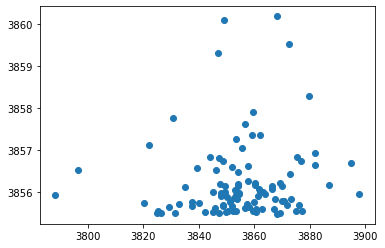

In [37]:
plt.scatter(b0_pred, rst_b0.mean((1,2)))

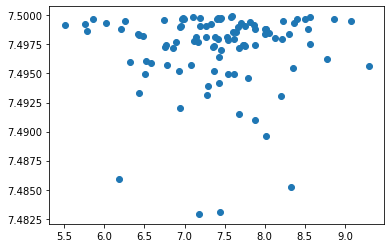

In [38]:
plt.scatter(b1_pred, rst_b1.mean((1,2)))

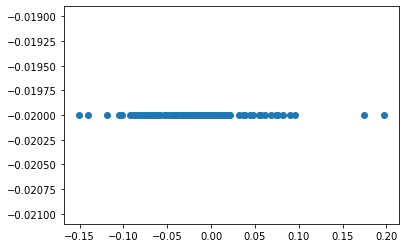

In [39]:
plt.scatter(b2_pred, rst_b2.mean((1,2)))